In [ ]:
# Imports
import matplotlib.pyplot as plt
import pickle
import torch
import ale_py
import numpy as np
import train_ddqn as ddqn
from neuralnetworks import DQN

[1] loss: 347.053
[2] loss: 2326.998
[3] loss: 331.032
[4] loss: 14.997
[5] loss: 284.203
[6] loss: 54.804
[7] loss: 18.895
[8] loss: 174.157
[9] loss: 14.441
[10] loss: 106.798
[11] loss: 16.657
[12] loss: 8.251
[13] loss: 100.369
[14] loss: 4.206
[15] loss: 519.545
[16] loss: 8.359
[17] loss: 71.756
[18] loss: 11.386
[19] loss: 61.955
[20] loss: 9.222
[21] loss: 73.371
[22] loss: 4.491
[23] loss: 154.799
[24] loss: 20.061
[25] loss: 38.873
[26] loss: 53.279
[27] loss: 4.476
[28] loss: 7.728
[29] loss: 33.389
[30] loss: 4.932
[31] loss: 8.679
[32] loss: 25.316
[33] loss: 11.177
[34] loss: 31.603
[35] loss: 5.861
[36] loss: 48.628
[37] loss: 5.461
[38] loss: 54.269
[39] loss: 17.184
[40] loss: 8.274
[41] loss: 17.718
[42] loss: 9.610
[43] loss: 22.738
[44] loss: 15.560
[45] loss: 16.062
[46] loss: 4.753
[47] loss: 21.477
[48] loss: 22.266
[49] loss: 5.434
[50] loss: 16.012
[51] loss: 22.280
[52] loss: 12.775
[53] loss: 21.145
[54] loss: 5.039
[55] loss: 15.676
[56] loss: 10.643
[57] lo

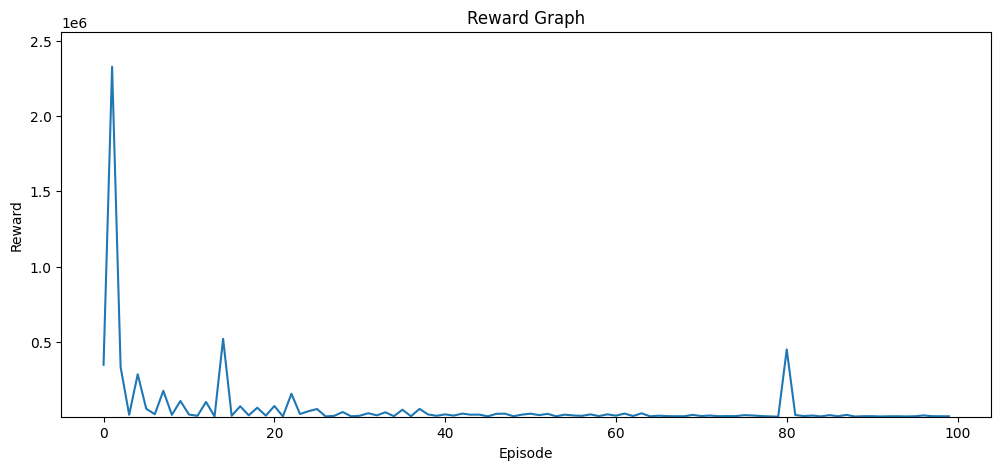

In [ ]:
predictNet, losses = ddqn.trainDDQN(epochs = 100, c = 10, k = 4)

# Visualization
maxreward = max(losses)
minreward = min(losses)
print("max reward", maxreward)
print("min reward", minreward)
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Reward Graph")
ax.set_ylabel("Reward")
ax.set_xlabel("Episode")
ax.set_ylim(bottom = minreward  - (.1 * abs(minreward)), top= abs(maxreward * 1.1) + 1)
ax.plot(range(len(losses)), losses)

In [ ]:
torch.save(predictNet.state_dict(), "./models/ddqn.pth")
with open('./models/losscurve.pkl', 'wb') as f:
    pickle.dump(losses, f)

max reward 2326998.3870327473
min reward 2370.5539531707764


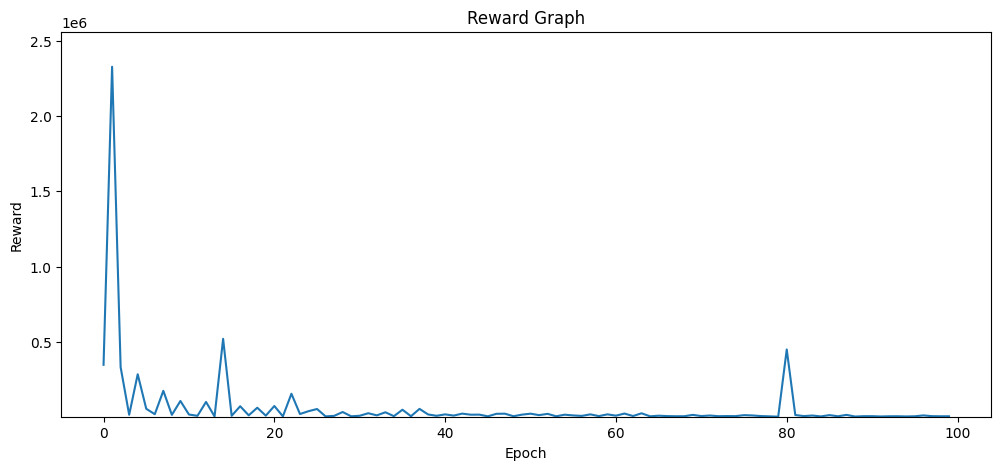

In [ ]:
losses = []
with open('./models/losscurve.pkl', 'rb') as f:
    losses = pickle.load(f)



# Visualization
maxreward = max(losses)
minreward = min(losses)
print("max reward", maxreward)
print("min reward", minreward)
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Reward Graph")
ax.set_ylabel("Reward")
ax.set_xlabel("Epoch")
ax.set_ylim(bottom = minreward  - (.1 * abs(minreward)), top= abs(maxreward * 1.1) + 1)
ax.plot(range(len(losses)), losses)

In [6]:
import csv
with open("losses.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    for item in losses:
        writer.writerow([item/1000.0])